# Z plots

In [1]:
import os, sys
sys.path.append(os.getcwd() + "/../")
from prep_ana_II import *

Welcome to JupyROOT 6.10/00
home /home/gunter/Analysis/Z_Analysis
Loading binning options...
Loading plotting options
unc_mc_process and scales are parameter dictionaries


In [2]:
%matplotlib inline

In [3]:
df = load_origMC()
df_da = load_origDATA()

Warning in <TStreamerInfo::BuildCheck>: 
   The StreamerInfo of class string read from file /home/gunter/Analysis/Z_Analysis/data//dy.root
   has the same version (=2) as the active class but a different checksum.
   You should update the version to ClassDef(string,3).
   Do not try to write objects with the current class definition,
   the files will not be readable.

Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::_Alloc_hider _M_dataplus; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   unsigned long _M_string_length; //
Warning in <TStreamerInfo::CompareContent>: The following data member of
the in-memory layout version 2 of class 'string' is missing from 
the on-file layout version 2:
   string::(anonymous) ; //


## scale factors

In [4]:
s = (1. - 2. * 458136. / (458136. + 2310196.)) * (1. - 2. *  18486791. / (113060642. + 18486791.) )**-1
_scales = copy.copy(scales)
_scales['DYJetsToLL_M-50'] = scales['DYJetsToLL_M-50'] * s

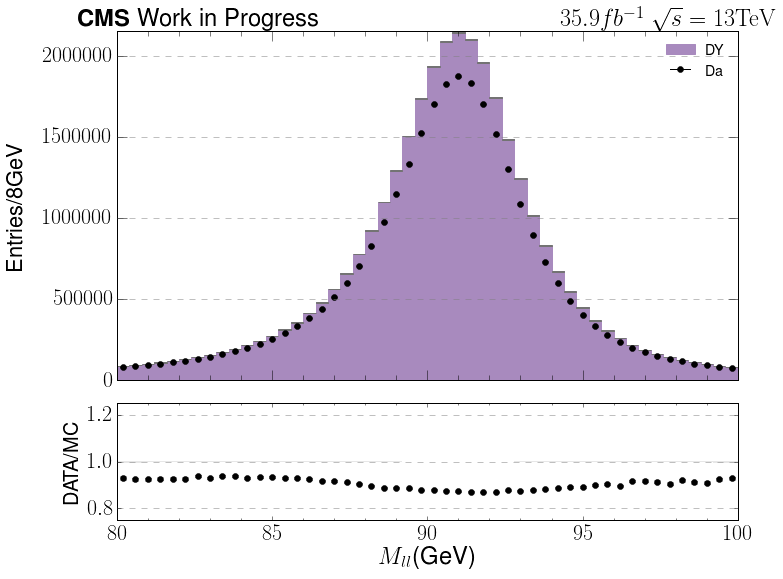

In [5]:
a = full_bin_plot(df, df_da, "mll", query=None, scales=scales, x_range=(80, 100), logy=False)

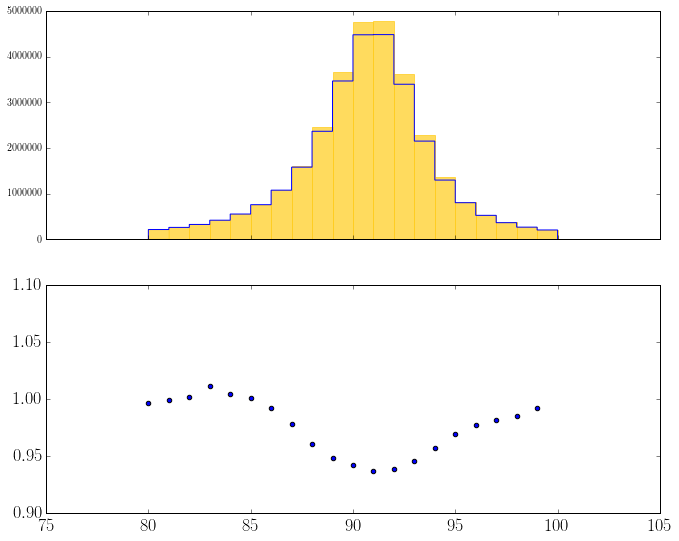

In [6]:
#ffac4e
fig, ax = plt.subplots(2, 1, figsize=(11,9), sharex=True, )

a = ax[0].hist(df.mll, bins=20, range=(80, 100), weights=scales['DYJetsToLL_M-50'] * df.weight * 0.93, edgecolor=[1.0, 0.8, 0.1, 0.7], color=[1.0, 0.8, 0.1, 0.7])
b = ax[0].hist(df_da.mll, bins=20, range=(80, 100), histtype="step")

ax[1].scatter(a[1][:-1], b[0]/a[0])
ax[1].set_ylim((0.9, 1.1))
plt.tick_params(labelsize=18)

In [10]:
features = ["met", "mll", "lep1_pt", "lep1_eta", "lep2_pt", "lep2_eta", "dilepton_type", "qt"]
lepton_flavors = ["dilepton_type == -2", "dilepton_type == -1", "dilepton_type < 0"]
for i, lep_type in enumerate(lepton_flavors):
    for feature in features:
        print lep_type, i, feature 
        a = full_bin_plot(df, df_da, feature,
                          query="lep1_pt > 30 and " + lep_type,
                          scales=scales,logy=False)
        a[2].savefig(production_path + "/plots/linear/tkgscale_" + feature + "_" + str(i) + ".png")
        plt.close();
        a = full_bin_plot(df, df_da, feature,
                          query="lep1_pt > 30 and " + lep_type,
                          scales=_scales, logy=False)
        a[2].savefig(production_path + "/plots/linear/"+ feature + "_" + str(i) + ".png")
        plt.close();
        a = full_bin_plot(df, df_da, feature,
                          query="met_filterflag_recommended == 0 and lep1_pt > 30 and " + lep_type,
                          scales=_scales, logy=False)
        a[2].savefig(production_path + "/plots/linear/metfilterflag_"+ feature + "_" + str(i) + ".png")
        plt.close();
        a = full_bin_plot(df, df_da, feature,
                          query="met_filterflag_recommended == 0 and lep1_pt > 30 and " + lep_type,
                          scales=scales, logy=False)
        a[2].savefig(production_path + "/plots/linear/tkgscale_metfilterflag_"+ feature + "_" + str(i) + ".png")
        plt.close();

dilepton_type == -2 0 met
dilepton_type == -2 0 mll
dilepton_type == -2 0 lep1_pt
dilepton_type == -2 0 lep1_eta
dilepton_type == -2 0 lep2_pt
dilepton_type == -2 0 lep2_eta
dilepton_type == -2 0 dilepton_type
dilepton_type == -2 0 qt
dilepton_type == -1 1 met
dilepton_type == -1 1 mll
dilepton_type == -1 1 lep1_pt
dilepton_type == -1 1 lep1_eta
dilepton_type == -1 1 lep2_pt
dilepton_type == -1 1 lep2_eta
dilepton_type == -1 1 dilepton_type
dilepton_type == -1 1 qt
dilepton_type < 0 2 met
dilepton_type < 0 2 mll
dilepton_type < 0 2 lep1_pt
dilepton_type < 0 2 lep1_eta
dilepton_type < 0 2 lep2_pt
dilepton_type < 0 2 lep2_eta
dilepton_type < 0 2 dilepton_type
dilepton_type < 0 2 qt


In [4]:
a = full_bin_plot(df, df_da, "qt",
                  query="met_filterflag_recommended == 0 and lep1_pt > 30",
                  scales=_scales, x_range=(0, 100), logy=False)

NameError: name '_scales' is not defined

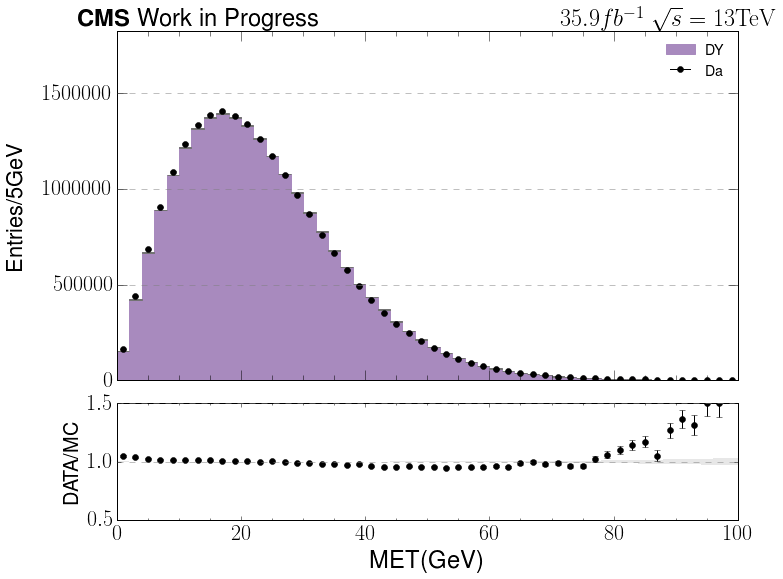

In [5]:
a = full_bin_plot(df, df_da, "met",
                  query="met_filterflag_recommended == 0 and lep1_pt > 30",
                  scales=_scales, logy=False, x_range=(0, 100))

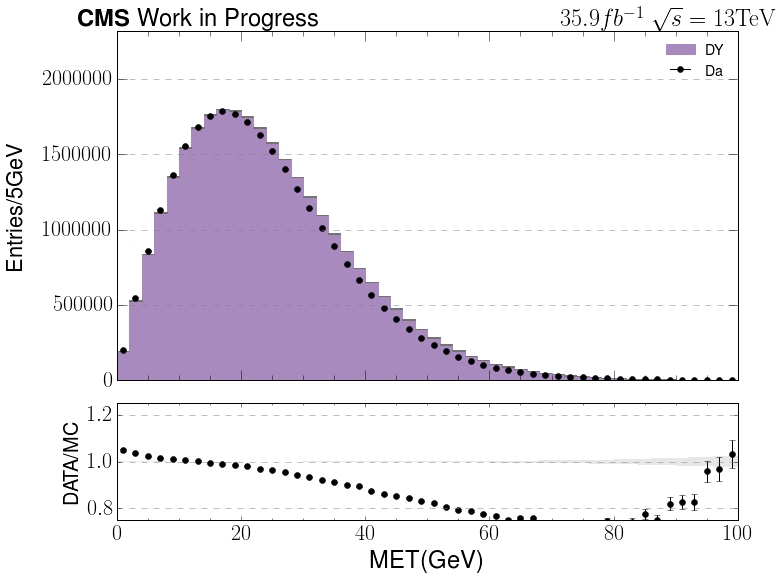

In [11]:
a = full_bin_plot(df, df_da, "met",
                  query="lep1_pt > 30",
                  scales=_scales, logy=False, x_range=(0, 100))

In [15]:
a[0]['DYJetsToLL_M-50'][0] * 1.10**-1

array([  1.75873109e+05,   4.80573438e+05,   7.60282938e+05,
         1.01352231e+06,   1.22782875e+06,   1.40205362e+06,
         1.52441925e+06,   1.60230388e+06,   1.63589138e+06,
         1.62870362e+06,   1.58955625e+06,   1.52451600e+06,
         1.43354075e+06,   1.33489500e+06,   1.22514638e+06,
         1.10956875e+06,   9.97543562e+05,   8.84996375e+05,
         7.80312062e+05,   6.76170562e+05,   5.91497562e+05,
         5.08870188e+05,   4.32135062e+05,   3.65357094e+05,
         3.08543219e+05,   2.57536797e+05,   2.15199531e+05,
         1.78537766e+05,   1.47188625e+05,   1.21572516e+05,
         9.91024531e+04,   8.22181953e+04,   6.58404766e+04,
         5.33389805e+04,   4.38483711e+04,   3.49795703e+04,
         2.84427676e+04,   2.27782148e+04,   1.81275605e+04,
         1.42575889e+04,   1.17036797e+04,   9.20922656e+03,
         7.18603564e+03,   5.93572949e+03,   4.58379053e+03,
         3.74293726e+03,   2.96085889e+03,   2.30216040e+03,
         1.80579712e+03,

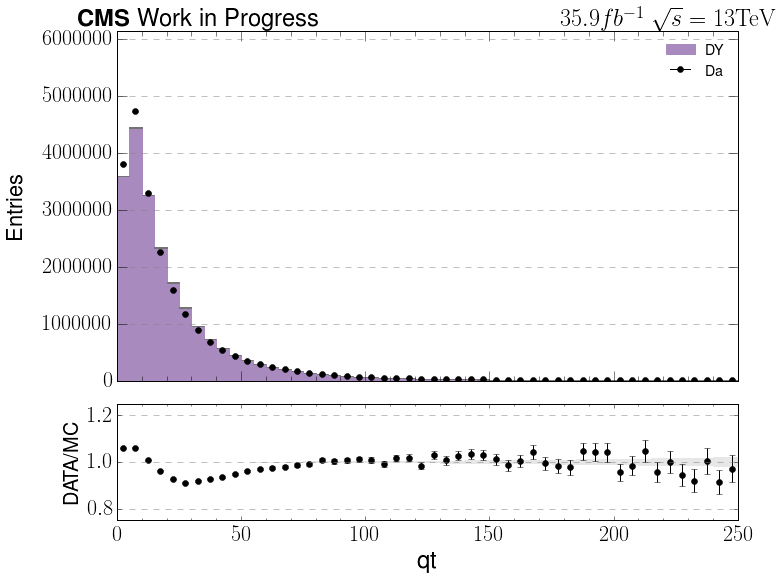

In [11]:
a = full_bin_plot(df, df_da, "qt",
                  query="met_filterflag_recommended == 0 and lep1_pt > 30", logy=False,
                  scales=_scales)

In [18]:
(121994000. - 113060642 - 18486791) / 121994000.

-0.07831067921373182